In [18]:
### preprocessing audio data for Deep Learning

#extract signals
#perform FFT
#extract power spectrum 
#extract spectrogram
#extract log spectrogram

In [6]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#load files
file = "audio/blues.00000.wav"

#waveform
signal, sr = librosa.load(file, sr=22050)#we will obtain a signal array with 22050*30 (sampleRate * T (song duration-sec))values

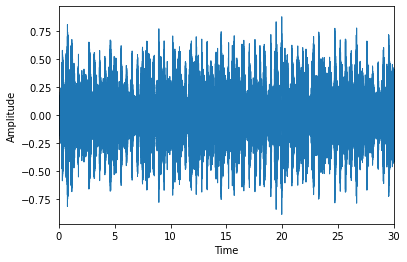

In [4]:
#visualize
librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [9]:
#move from time domain to frequency domain ----- Fast Fourier Transformabs

#spectrum
fft = np.fft.fft(signal) # a one dimensional array 

#get magnitude of values
magnitude = np.abs(fft)  

#map unto relative frequency bit
frequency = np.linspace(0, sr, len(magnitude)) #evenly spaced values betweeen 0 and sample rate

array([0.00000000e+00, 3.33185754e-02, 6.66371509e-02, ...,
       2.20499334e+04, 2.20499667e+04, 2.20500000e+04])

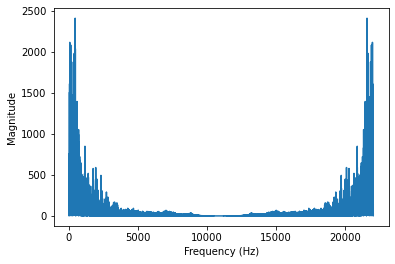

In [10]:
#plot spectrum (power spectrum)
plt.plot(frequency, magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()
#symmetrical plot

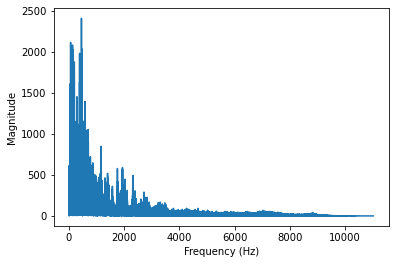

In [12]:
#since we don't need the right half of the sample rate....

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()



In [13]:
#power spectrum is a static snapshot of the whole sound
# we need to perform a Short Time Fourier Transform

num_samples_per_fft = 2048 #the time window we consider to perform a single FFT
hop_length = 512  #number of samples -- slide interval towards the next window

#perform STFT
stft = librosa.core.stft(signal, hop_length = hop_length, n_fft = num_samples_per_fft)

spectrogram = np.abs(stft)

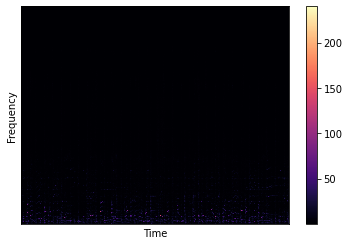

In [15]:
#plot heatmap-like visualization

#plot amplitude as a function of time and frequency - how the amplitude varies
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

#most of the frequencies have very low amplitudes

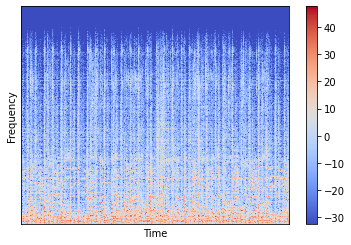

In [16]:
#calculate log spectrogram

log_Spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_Spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

#variations are now perceivable

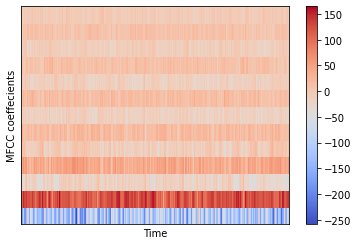

In [17]:
#extract MFCCs

MFCCs = librosa.feature.mfcc(signal, n_fft=num_samples_per_fft, hop_length=hop_length, n_mfcc= 13) 
#n_fft - perform short time fourier transfer
#n_mfcc number of features we want to extract


#plot
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coeffecients")
plt.colorbar()
plt.show()


#MFCCs over time